# Lab 3

|DAVE3625|Lab 3|Oblig 1|
|--------|-----|-------|

#### Some notes about the lab
- Since i have done lab 3 in one notebook, i have two different df.
- df = the one that contains fake data
- dfplanes =  the plane with departue times 

#### Porpouse of generating fake data

The most imporant reason to generate fake data is privacy. This is aspecially important for traing AI models, as this makes sure that the privacy of the end user is ensured and you can train your Ai model before providing properly data. Fake data is also important for testing propourses [K2View](https://www.k2view.com/blog/generate-fake-data/). You can also conserve resources, with means that you can generate more data with the same power. 

Please refer to the code comments, as this will be the main way for me to comment on how the code works

In [150]:
#imports, in this first part we mainly use faker and pandas
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime
from faker import Faker; 
import pandas as pd; 
from faker.providers.credit_card import Provider as creditcardProivder; 


df = pd.DataFrame(columns=['Navn', 'Adresse', 'PersonNr', 'CreditCard', 'ipv4']) #Used to define what the different columbs are
#Colums: Navn, Adresse, PersonNr, Creditcard, ipv4
fake = Faker(['no_NO']) #decides the condition for the fake credential -> this instance, we can see the that is use Norwegian setting 
#Uses a for loop to add the fake data. 
for i in range(0,100):
    row=fake.name(),fake.address(),fake.ssn(),fake.credit_card_number(), fake.ipv4()
    df.loc[i]=row

df.head() # To Make sure that the data is shown properly and the dataset looks good (at least at first glance)

,Navn,Adresse,PersonNr,CreditCard,ipv4
0,Joakim Ali,"Kristiansenmyra 81, 1049 Jakobsen",13074134496,38054962421783,12.193.16.131
1,Nils-Sindre Andresen,"Pettersenstykket 5, 2883 Astridberg",07098606895,4587221532106,170.222.121.9
2,Ann Christensen,"Ahmedekra 1, 1994 Nygård",24105126723,4329243777453244,172.144.226.187
3,Håvard Birkeland,"Bergehavna 7, 3304 Thorsen",26019547972,4712333999766015520,40.60.9.117
4,Hanna Hagen-Paulsen,"Jensentjernet 4, 8173 Myhre",09106938382,4853901013597,21.220.169.239


Task 2: data anonymization

In [151]:
#Waiting for answear from TAs, due to the issues with landromat

## explaination of the code provided from the TAs  
**NOTE:** *Due to the import issues i will try to explian in this markdown block on how the code could have worked*

```


```


## Part 2: Plane and delays (Task 3)

### Task 3: Time Series 

In This task we will try to understand more about how it is to work with time in pandas.

In [152]:
dfPlanes = pd.read_csv('https://raw.githubusercontent.com/atikagondal/Lab-2023-DAVE3625/main/Lab3/data/flight.csv')
dfPlanes.head()
dfPlanes['dep_time'] = pd.to_datetime(dfPlanes['dep_time'], errors="coerce") 
dfPlanes['arr_time'] = pd.to_datetime(dfPlanes['arr_time'], errors="coerce")
dfPlanes['sched_arr_time'] = pd.to_datetime(dfPlanes['sched_arr_time'], errors="coerce")
dfPlanes['airTime'] = abs(dfPlanes['dep_time'] - dfPlanes['arr_time'])
dfPlanes['delay'] = abs(dfPlanes['arr_time'] - dfPlanes['sched_arr_time'])


dfPlanes.head()


,Unnamed: 0,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest,airTime,delay
0,0,2013-1-1 05:40:00,2013-01-01 05:42:00,2013-01-01 09:23:00,2013-01-01 08:50:00,1141,JFK,MIA,0 days 03:41:00,0 days 00:33:00
1,1,2013-1-1 06:00:00,2013-01-01 05:54:00,2013-01-01 08:12:00,2013-01-01 08:37:00,461,LGA,ATL,0 days 02:18:00,0 days 00:25:00
2,2,2013-1-1 05:58:00,2013-01-01 05:54:00,2013-01-01 07:40:00,2013-01-01 07:28:00,1696,EWR,ORD,0 days 01:46:00,0 days 00:12:00
3,3,2013-1-1 06:00:00,2013-01-01 05:55:00,2013-01-01 09:13:00,2013-01-01 08:54:00,507,EWR,FLL,0 days 03:18:00,0 days 00:19:00
4,4,2013-1-1 06:00:00,2013-01-01 05:57:00,2013-01-01 08:38:00,2013-01-01 08:46:00,79,JFK,MCO,0 days 02:41:00,0 days 00:08:00


## showing the percent of delay 

<Axes: >

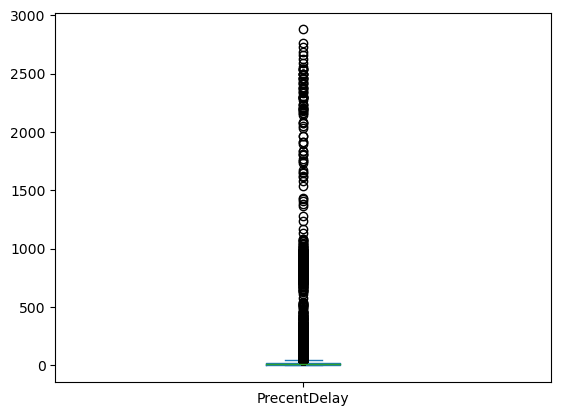

In [153]:

dfPlanes['PrecentDelay'] = (100 * dfPlanes['delay'])/dfPlanes['airTime']
dfPlanes['PrecentDelay'].plot.box()


## creating a scatterplot

i decided to step away from the lab and include the lower and higher five percent. 

In [154]:
from pandas.api.types import is_numeric_dtype
def remove_outlier(df): 
    low = 0.5
    high = 0.95
    quant_df = df.quantile([low,high])
    if is_numeric_dtype(df):
        df = df[(df > quant_df.loc[low]) & (df < quant_df.loc[high])]
    return df 

<Axes: xlabel='dest', ylabel='PrecentDelay'>

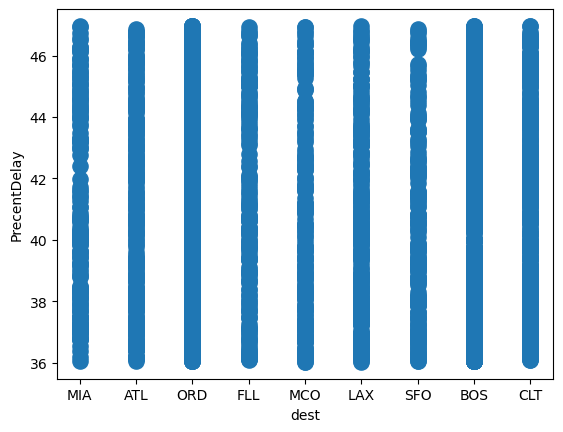

In [158]:

dfPlanes['PrecentDelay'] = remove_outlier(dfPlanes['PrecentDelay'])
dfPlanes.plot.scatter(x = 'dest',y = 'PrecentDelay', s=120)